## Dataset: https://archive.ics.uci.edu/ml/datasets/Gas+sensor+array+exposed+to+turbulent+gas+mixtures 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [9]:
data_dir = "/Users/phuongnh10/Documents/02-CEP/06-Agilent/05-Code/dataset_two_gas_sources_/dataset_twosources_raw" 

In [16]:
files = sorted(glob(data_dir + "/*"))
print("Number of samples: " + str(len(files)))

Number of samples: 180


In [23]:
data = pd.read_csv(files[0], header=None)
data.columns = ['Time (s)', 'Temperature (oC)', 'Relative Humidity (%)', 'TGS2600', 'TGS2602-1', 'TGS2602-2', 'TGS2620-1', 'TGS2612', 'TGS2620-2', 'TGS2611', 'TGS2610']
data.head()

,Time (s),Temperature (oC),Relative Humidity (%),TGS2600,TGS2602-1,TGS2602-2,TGS2620-1,TGS2612,TGS2620-2,TGS2611,TGS2610
0,1.92,22.46,40.7,331.0,275.0,518.0,572.0,566.0,700.0,629.0,719.0
1,1.94,22.46,40.7,331.0,274.0,518.0,572.0,565.0,700.0,630.0,719.0
2,1.96,22.46,40.7,331.0,274.0,519.0,572.0,566.0,700.0,629.0,719.0
3,1.98,22.46,40.7,331.0,274.0,518.0,572.0,566.0,700.0,629.0,719.0
4,2.00,22.46,40.7,331.0,274.0,518.0,571.0,566.0,700.0,630.0,719.0


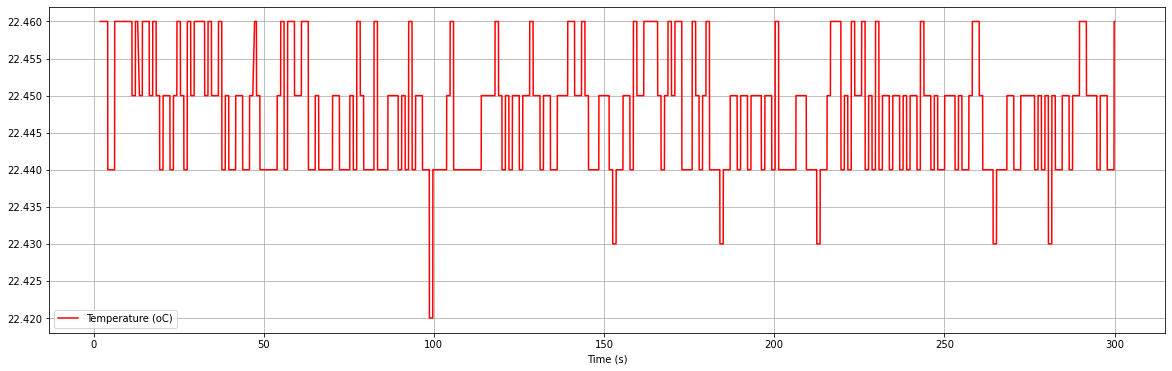

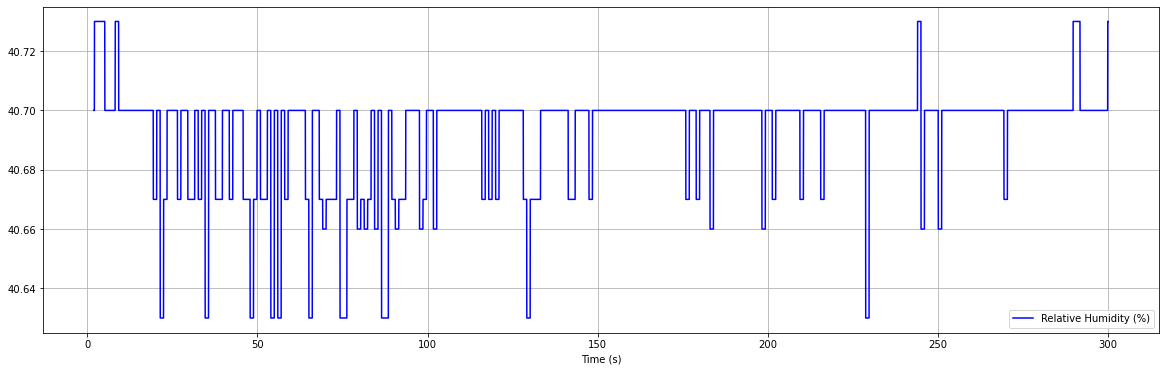

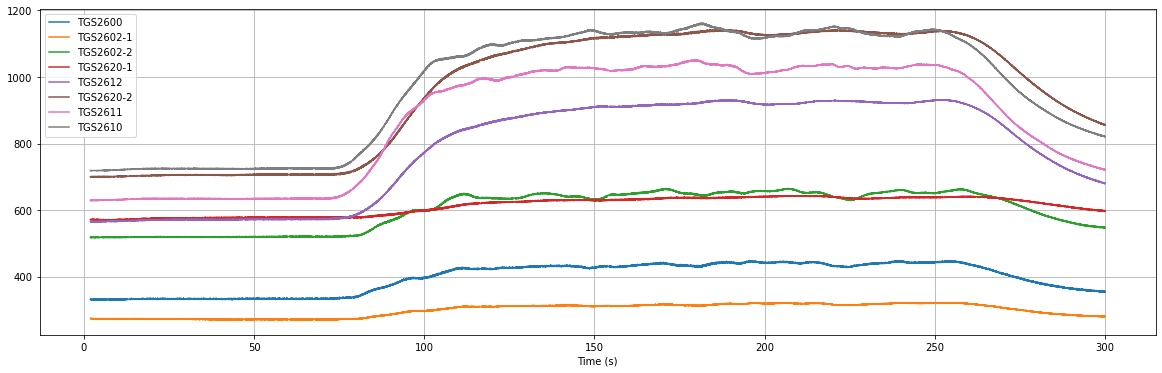

In [33]:
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
data.plot(x='Time (s)', y='Temperature (oC)', color='red', ax=ax)
plt.grid()
plt.show()

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
data.plot(x='Time (s)', y='Relative Humidity (%)', color='blue', ax=ax)
plt.grid()
plt.show()

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
data.plot(x='Time (s)', y='TGS2600', ax=ax)
data.plot(x='Time (s)', y='TGS2602-1', ax=ax)
data.plot(x='Time (s)', y='TGS2602-2', ax=ax)
data.plot(x='Time (s)', y='TGS2620-1', ax=ax)
data.plot(x='Time (s)', y='TGS2612', ax=ax)
data.plot(x='Time (s)', y='TGS2620-2', ax=ax)
data.plot(x='Time (s)', y='TGS2611', ax=ax)
data.plot(x='Time (s)', y='TGS2610', ax=ax)
plt.grid()
plt.show()

## Dataset: https://archive.ics.uci.edu/ml/datasets/gas+sensor+array+under+dynamic+gas+mixtures

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import svm

In [2]:
data_path = "./data/gas_mixture_dataset"
co_filename = "ethylene_CO.txt"
methane_filename = "ethylene_methane.txt"

In [3]:
# ethylene methane (EM) data 
# 'ethylene_CO.txt': contains the recordings from the sensors when exposed to mixtures of Ethylene and CO in air.
em_df = pd.read_csv(os.path.join(data_path, methane_filename), skiprows=1, header=None, delim_whitespace=True)
em_df.columns = ['Time', 'Methane_conc', 'Ethylene_conc', 
                 'TGS2602-1', 'TGS2602-2', 'TGS2600-1', 'TGS2600-2', 
                 'TGS2610-1', 'TGS2610-2', 'TGS2620-1', 'TGS2620-2',
                 'TGS2602-3', 'TGS2602-4', 'TGS2600-3', 'TGS2600-4', 
                 'TGS2610-3', 'TGS2610-4', 'TGS2620-3', 'TGS2620-4']
print("Number of samples: ", em_df.shape[0])
em_df.head()

Number of samples:  4178504


,Time,Methane_conc,Ethylene_conc,TGS2602-1,TGS2602-2,TGS2600-1,TGS2600-2,TGS2610-1,TGS2610-2,TGS2620-1,TGS2620-2,TGS2602-3,TGS2602-4,TGS2600-3,TGS2600-4,TGS2610-3,TGS2610-4,TGS2620-3,TGS2620-4
0,0.00,0.0,0.0,-41.98,2067.64,-37.13,2.28,8.63,-26.62,-8.46,-0.33,3437.73,2728.14,4054.03,4007.89,4478.27,5056.98,3639.09,3128.49
1,0.01,0.0,0.0,-46.50,2067.88,-28.56,13.69,-12.35,-25.81,-5.04,-5.04,3432.44,2734.47,4038.62,4019.40,4496.72,5051.81,3636.97,3115.03
2,0.02,0.0,0.0,-36.16,2055.81,-10.89,8.63,-2.93,-30.34,-9.27,-2.12,3438.61,2719.97,4030.92,4025.48,4489.54,5057.35,3641.81,3105.24
3,0.03,0.0,0.0,-50.36,2053.68,-31.96,-0.65,-8.29,-21.60,7.98,2.28,3429.51,2720.50,4040.22,4000.87,4485.44,5049.60,3642.72,3124.84
4,0.04,0.0,0.0,-37.30,2081.17,-36.16,3.26,5.05,-26.14,-7.48,-0.65,3436.85,2719.71,4029.64,4007.25,4499.12,5057.35,3674.30,3147.59


In [51]:
em_df[:1000].to_json("test.json")

### Visualize raw data

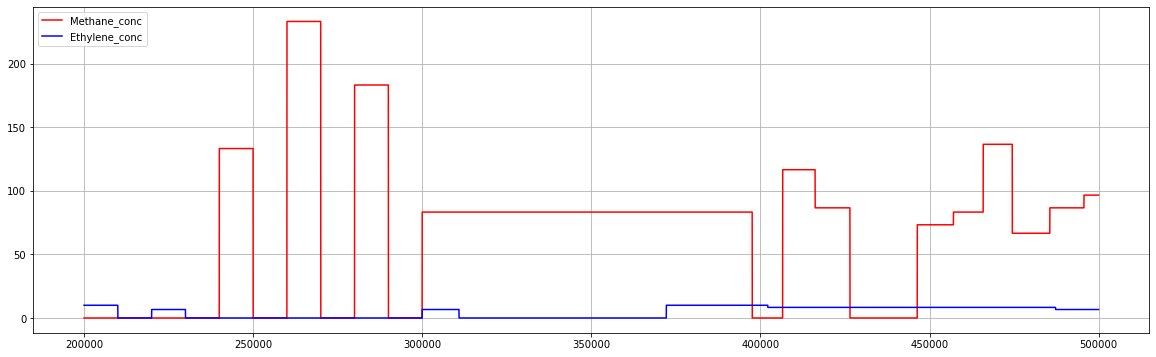

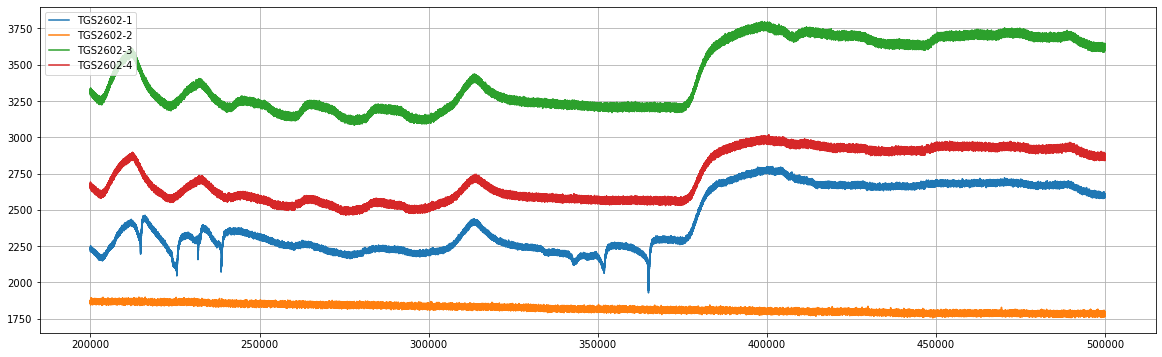

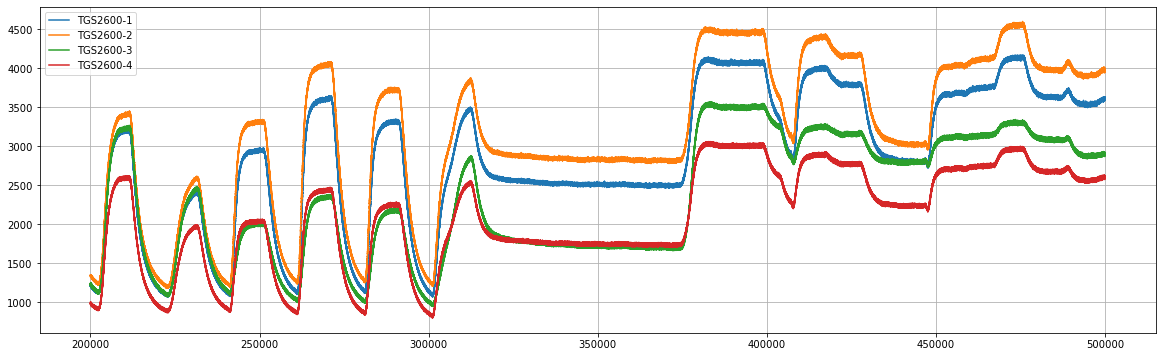

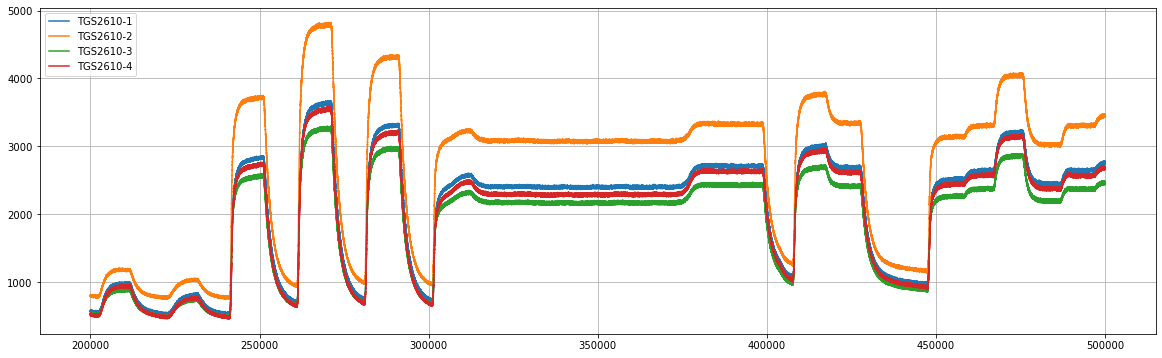

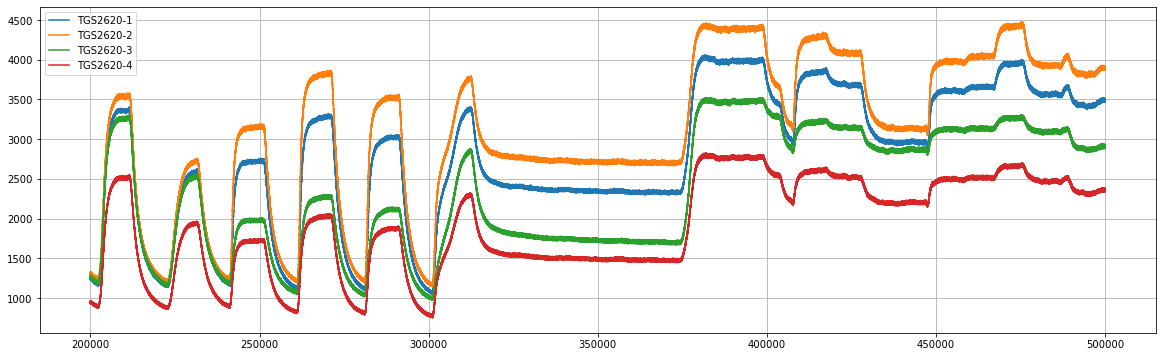

In [48]:
start = 200000
end = 500000


fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
em_df[start:end].plot(y='Methane_conc', color='red', ax=ax)
em_df[start:end].plot(y='Ethylene_conc', color='blue', ax=ax)
plt.legend(loc='upper left')
plt.grid()
plt.show()

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
em_df[start:end].plot(y='TGS2602-1', ax=ax)
em_df[start:end].plot(y='TGS2602-2', ax=ax)
em_df[start:end].plot(y='TGS2602-3', ax=ax)
em_df[start:end].plot(y='TGS2602-4', ax=ax)
plt.legend(loc='upper left')
plt.grid()
plt.show()

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
em_df[start:end].plot(y='TGS2600-1', ax=ax)
em_df[start:end].plot(y='TGS2600-2', ax=ax)
em_df[start:end].plot(y='TGS2600-3', ax=ax)
em_df[start:end].plot(y='TGS2600-4', ax=ax)
plt.legend(loc='upper left')
plt.grid()
plt.show()

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
em_df[start:end].plot(y='TGS2610-1', ax=ax)
em_df[start:end].plot(y='TGS2610-2', ax=ax)
em_df[start:end].plot(y='TGS2610-3', ax=ax)
em_df[start:end].plot(y='TGS2610-4', ax=ax)
plt.legend(loc='upper left')
plt.grid()
plt.show()

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
em_df[start:end].plot(y='TGS2620-1', ax=ax)
em_df[start:end].plot(y='TGS2620-2', ax=ax)
em_df[start:end].plot(y='TGS2620-3', ax=ax)
em_df[start:end].plot(y='TGS2620-4', ax=ax)
plt.legend(loc='upper left')
plt.grid()
plt.show()

### Preprocess data

In [5]:
# create timedate index 
processed_df = em_df
processed_df["Time"] = pd.to_timedelta(processed_df["Time"], unit='s')
processed_df = processed_df.set_index('Time')

# min-max normalization
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(processed_df.values)
scaled_df = pd.DataFrame(scaled_df, columns=processed_df.columns)
scaled_df.index = processed_df.index

# downsampling to 1 second interval
scaled_df = scaled_df.resample('10s').mean()

print("Number of samples after normalization: ", scaled_df.shape[0])
scaled_df.head()

Number of samples after normalization:  4180


,Methane_conc,Ethylene_conc,TGS2602-1,TGS2602-2,TGS2600-1,TGS2600-2,TGS2610-1,TGS2610-2,TGS2620-1,TGS2620-2,TGS2602-3,TGS2602-4,TGS2600-3,TGS2600-4,TGS2610-3,TGS2610-4,TGS2620-3,TGS2620-4
Time,,,,,,,,,,,,,,,,,,
0 days 00:00:00,0.0,0.0,0.339637,0.060391,0.435042,0.435135,0.511181,0.498301,0.432443,0.460782,0.316347,0.314575,0.800928,0.978773,0.981738,0.985838,0.728225,0.797471
0 days 00:00:10,0.0,0.0,0.741987,0.059962,0.967936,0.967795,0.960037,0.933427,0.853896,0.884382,0.337800,0.337290,0.745586,0.914576,0.942582,0.949830,0.678306,0.756541
0 days 00:00:20,0.0,0.0,0.747490,0.058871,0.815642,0.814185,0.743564,0.730451,0.701129,0.705304,0.376451,0.380658,0.638549,0.775039,0.650297,0.673701,0.546274,0.609772
0 days 00:00:30,0.0,0.0,0.729775,0.057809,0.629475,0.626960,0.503826,0.493271,0.521788,0.514185,0.380876,0.396247,0.486890,0.570589,0.400419,0.410875,0.385965,0.420793
0 days 00:00:40,0.0,0.0,0.710372,0.056787,0.494844,0.491047,0.372685,0.363990,0.414771,0.406574,0.353459,0.376962,0.366393,0.416752,0.268932,0.271548,0.287924,0.305378


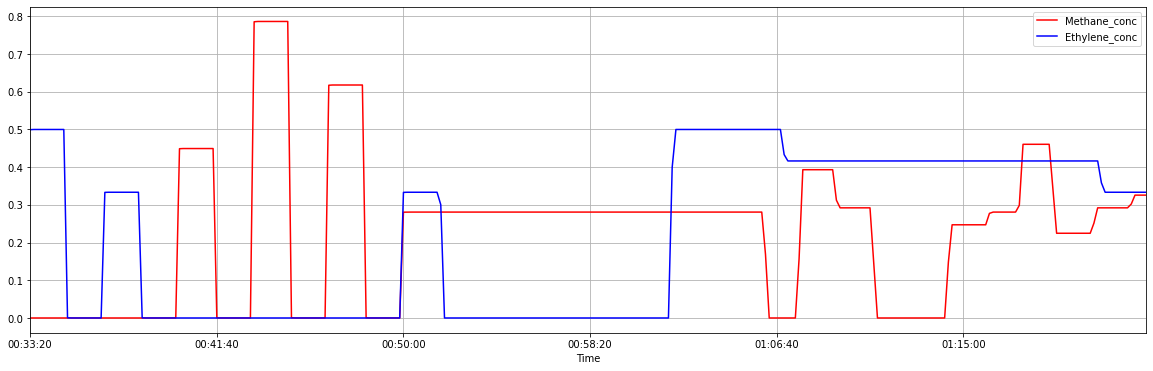

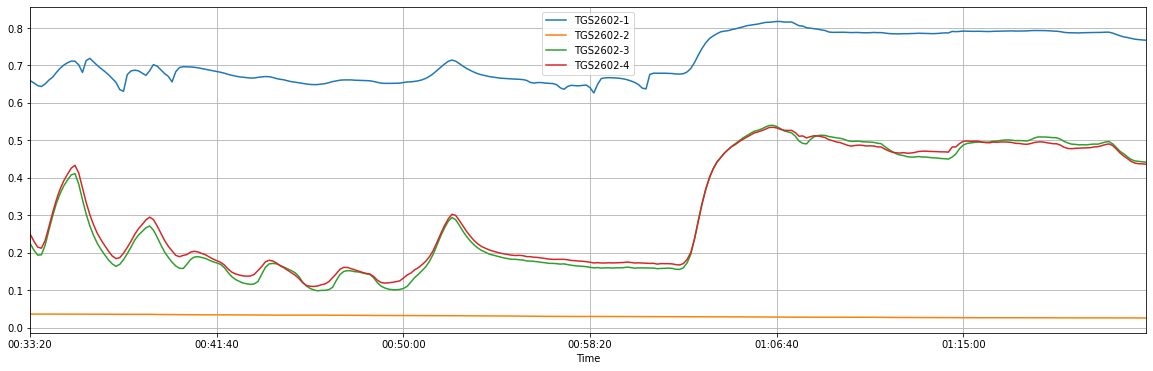

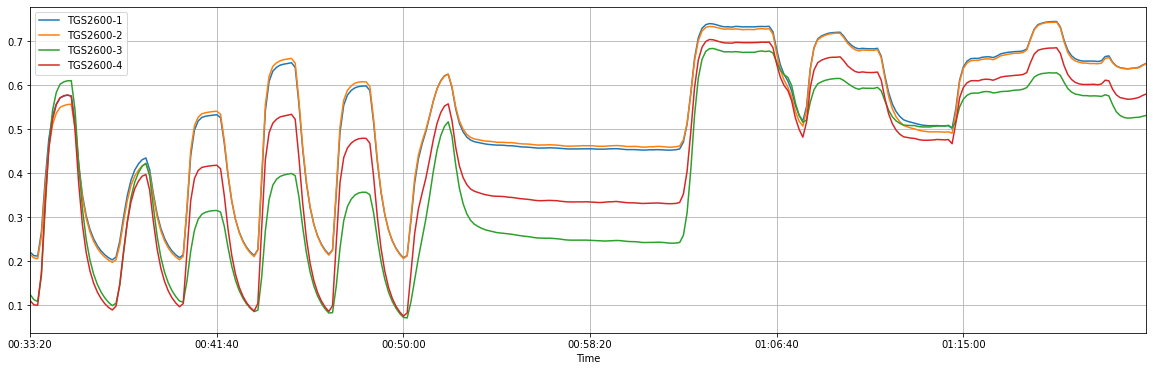

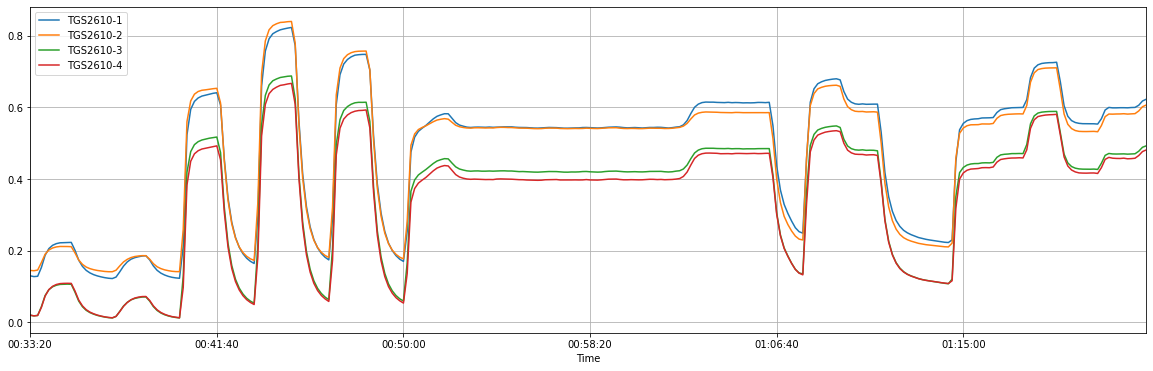

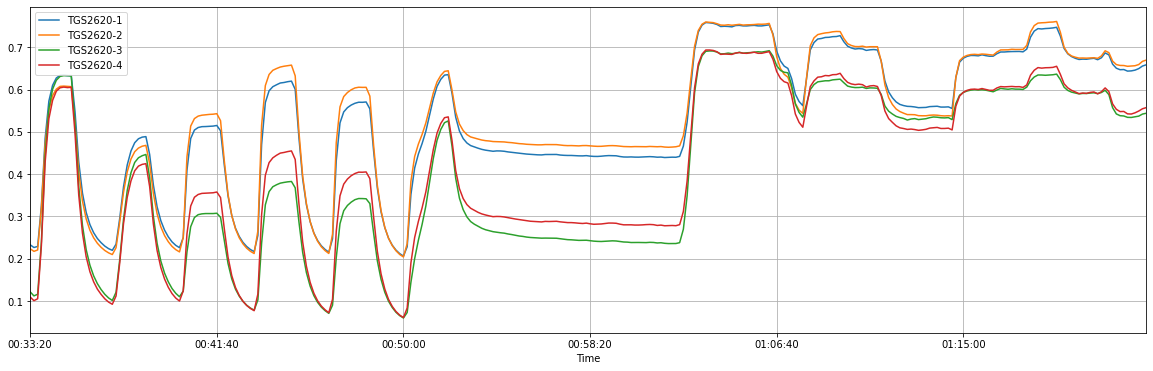

In [6]:
start = 200
end = 500


fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
scaled_df[start:end].plot(y='Methane_conc', color='red', ax=ax)
scaled_df[start:end].plot(y='Ethylene_conc', color='blue', ax=ax)
plt.grid()
plt.show()

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
scaled_df[start:end].plot(y='TGS2602-1', ax=ax)
scaled_df[start:end].plot(y='TGS2602-2', ax=ax)
scaled_df[start:end].plot(y='TGS2602-3', ax=ax)
scaled_df[start:end].plot(y='TGS2602-4', ax=ax)
plt.grid()
plt.show()

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
scaled_df[start:end].plot(y='TGS2600-1', ax=ax)
scaled_df[start:end].plot(y='TGS2600-2', ax=ax)
scaled_df[start:end].plot(y='TGS2600-3', ax=ax)
scaled_df[start:end].plot(y='TGS2600-4', ax=ax)
plt.grid()
plt.show()

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
scaled_df[start:end].plot(y='TGS2610-1', ax=ax)
scaled_df[start:end].plot(y='TGS2610-2', ax=ax)
scaled_df[start:end].plot(y='TGS2610-3', ax=ax)
scaled_df[start:end].plot(y='TGS2610-4', ax=ax)
plt.grid()
plt.show()

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
scaled_df[start:end].plot(y='TGS2620-1', ax=ax)
scaled_df[start:end].plot(y='TGS2620-2', ax=ax)
scaled_df[start:end].plot(y='TGS2620-3', ax=ax)
scaled_df[start:end].plot(y='TGS2620-4', ax=ax)
plt.grid()
plt.show()

### PCA & LDA

In [10]:
scaled_df.iloc[:, 2:]

,TGS2602-1,TGS2602-2,TGS2600-1,TGS2600-2,TGS2610-1,TGS2610-2,TGS2620-1,TGS2620-2,TGS2602-3,TGS2602-4,TGS2600-3,TGS2600-4,TGS2610-3,TGS2610-4,TGS2620-3,TGS2620-4
Time,,,,,,,,,,,,,,,,
0 days 00:00:00,0.339637,0.060391,0.435042,0.435135,0.511181,0.498301,0.432443,0.460782,0.316347,0.314575,0.800928,0.978773,0.981738,0.985838,0.728225,0.797471
0 days 00:00:10,0.741987,0.059962,0.967936,0.967795,0.960037,0.933427,0.853896,0.884382,0.337800,0.337290,0.745586,0.914576,0.942582,0.949830,0.678306,0.756541
0 days 00:00:20,0.747490,0.058871,0.815642,0.814185,0.743564,0.730451,0.701129,0.705304,0.376451,0.380658,0.638549,0.775039,0.650297,0.673701,0.546274,0.609772
0 days 00:00:30,0.729775,0.057809,0.629475,0.626960,0.503826,0.493271,0.521788,0.514185,0.380876,0.396247,0.486890,0.570589,0.400419,0.410875,0.385965,0.420793
0 days 00:00:40,0.710372,0.056787,0.494844,0.491047,0.372685,0.363990,0.414771,0.406574,0.353459,0.376962,0.366393,0.416752,0.268932,0.271548,0.287924,0.305378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 11:35:50,0.709758,0.004084,0.266787,0.265073,0.219675,0.219397,0.246108,0.246505,0.251004,0.267916,0.126006,0.129397,0.108321,0.099236,0.097753,0.100447
0 days 11:36:00,0.710923,0.004033,0.247263,0.245206,0.204180,0.206595,0.233089,0.232830,0.253269,0.271289,0.108830,0.110283,0.094316,0.085712,0.085816,0.087592
0 days 11:36:10,0.713158,0.003999,0.233095,0.230713,0.193389,0.198211,0.224232,0.223318,0.256171,0.275548,0.095781,0.096523,0.084349,0.076453,0.077266,0.078781


In [27]:
num_components = 8

# PCA
pca = PCA(n_components='mle')
pca.fit(scaled_df.iloc[:, 2:])
print("PCA number of features during fitting: ", pca.n_features_in_)
print("PCA estimated number of components: ", pca.n_components_)
print("PCA components: \n", pca.components_)
print("PCA variance: ", pca.explained_variance_)
print("PCA singular values: ", pca.singular_values_)

PCA number of features during fitting:  16
PCA estimated number of components:  15
PCA components: 
 [[ 5.40761477e-02 -3.29147025e-04  2.82157752e-01  2.81325072e-01  2.65235979e-01  2.51721046e-01  2.81491951e-01  2.89895672e-01  1.46164400e-01  1.31482277e-01  2.94022489e-01  3.19627317e-01  2.54321866e-01  2.51595498e-01  2.99667094e-01  3.10298728e-01]
 [ 1.26934803e-01 -4.77225275e-03  2.27857120e-02  2.58667847e-03 -3.88105145e-01 -4.09020931e-01  8.63476223e-02  3.70289185e-02  2.99553936e-01  3.04666306e-01  2.54636505e-01  1.21869747e-01 -3.78299144e-01 -3.63722200e-01  2.75849297e-01  2.06990591e-01]
 [-2.32994977e-01  4.20118485e-02  7.87676864e-02  6.67133496e-02 -1.36856200e-01 -1.57883164e-01  1.37287516e-01  1.19419095e-01 -5.92779299e-01 -5.89386303e-01  1.31371879e-01  1.44471963e-01 -1.42774213e-01 -1.32176632e-01  2.05160506e-01  1.99217543e-01]
 [-2.46926870e-03 -2.70800472e-02 -4.22067616e-01 -4.49077426e-01 -1.70497448e-02  1.20746612e-01  2.25000785e-01  2.58559

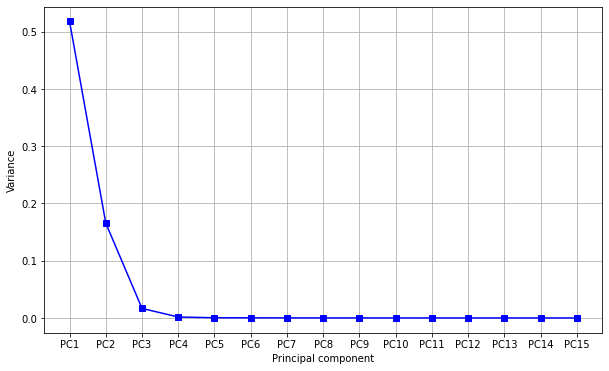

In [47]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
plt.plot(pca.explained_variance_, 'bs-')
plt.ylabel("Variance")
plt.xlabel("Principal component")
plt.xticks(np.arange(0,15), ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15'])
plt.grid()
plt.show()